# Setup

### Import libraries

In [40]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import glob

### Declare csv folder

In [28]:
CSV_DIR = "dataframes"

In [38]:
def evaluate_model_metrics_text(folder_path):
    """
    Process all CSV files in the specified folder, computing confusion matrices
    and classification metrics (precision, recall, F1-score, support) for each file.

    Parameters:
        folder_path (str): Path to the folder containing CSV files.

    Returns:
        None (prints results).
    """
    # Get all CSV files in the folder and sort them numerically
    csv_files = sorted(
        glob.glob(os.path.join(folder_path, "*.csv")),
        key=lambda x: int(os.path.basename(x).split("(")[1].split(")")[0]) if "(" in os.path.basename(x) else float("inf")
    )

    if not csv_files:
        print("No CSV files found in the folder.")
        return

    for file in csv_files:
        file_name = os.path.basename(file)
        
        print(f"\nProcessing file: {file_name}")

        # Skip file if the name matches trial (X).csv format
        if not (file_name.startswith("trial") and "(" in file_name and ")" in file_name):
            continue

        # Read the CSV file
        df = pd.read_csv(file)

        # Ensure the required columns exist
        if not {'Damage Type', 'Prediction'}.issubset(df.columns):
            continue

        # Extract ground truth and predictions
        y_true = df['Damage Type']
        y_pred = df['Prediction']

        # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        print("Confusion Matrix:")
        print(cm)

        # Compute classification metrics
        report = classification_report(y_true, y_pred, zero_division=0)
        print("Classification Report:")
        print(report)


In [43]:
def evaluate_model_metrics(folder_path):
    """
    Process all CSV files in the specified folder, computing confusion matrices
    and classification metrics (precision, recall, F1-score, support) for each file.

    Parameters:
        folder_path (str): Path to the folder containing CSV files.

    Returns:
        None (Displays the plots).
    """
    # Get all CSV files in the folder and sort them numerically
    csv_files = sorted(
        glob.glob(os.path.join(folder_path, "*.csv")),
        key=lambda x: int(os.path.basename(x).split("(")[1].split(")")[0]) if "(" in os.path.basename(x) else float("inf")
    )

    if not csv_files:
        print("No CSV files found in the folder.")
        return

    # Set global plot aesthetics
    sns.set_context("paper", font_scale=1.2)
    sns.set_style("whitegrid")

    num_files = len(csv_files)
    rows = (num_files + 1) // 2  # Two trials per row
    fig, axes = plt.subplots(rows, 4, figsize=(15, rows * 4))
    axes = axes.flatten()

    for idx, file in enumerate(csv_files):
        file_name = os.path.basename(file)
        
        print(f"\nProcessing file: {file_name}")

        # Skip file if the name does not match trial (X).csv format
        if not (file_name.startswith("trial") and "(" in file_name and ")" in file_name):
            continue

        # Read the CSV file
        df = pd.read_csv(file)

        # Ensure the required columns exist
        if not {'Damage Type', 'Prediction'}.issubset(df.columns):
            continue

        # Extract ground truth and predictions
        y_true = df['Damage Type']
        y_pred = df['Prediction']

        # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Visualize confusion matrix
        sns.heatmap(
            cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=set(y_pred), yticklabels=set(y_true), ax=axes[idx * 2], linewidths=0.5, linecolor="black"
        )
        axes[idx * 2].set_title(f"Confusion Matrix: {file_name.split('.')[0]}")
        axes[idx * 2].set_xlabel("Predicted")
        axes[idx * 2].set_ylabel("Actual")
        axes[idx * 2].tick_params(axis='x', rotation=45)

        # Compute classification metrics
        report_dict = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
        report_df = pd.DataFrame(report_dict).transpose()

        # Visualize classification report as heatmap
        sns.heatmap(
            report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=False, ax=axes[idx * 2 + 1], linewidths=0.5, linecolor="black"
        )
        axes[idx * 2 + 1].set_title(f"Classification Report: {file_name.split('.')[0]}")

    # Hide unused subplots
    for i in range(idx * 2 + 2, len(axes)):
        axes[i].axis("off")

    plt.tight_layout()
    plt.savefig("model_metrics_output.png", dpi=300)
    plt.show()

In [39]:
evaluate_model_metrics_text(CSV_DIR)


Processing file: trial (2).csv
Confusion Matrix:
[[147  27  19]
 [  8 231  28]
 [ 17  42 177]]
Classification Report:
                precision    recall  f1-score   support

Corrosionstain       0.85      0.76      0.81       193
        Cracks       0.77      0.87      0.81       267
      Spalling       0.79      0.75      0.77       236

      accuracy                           0.80       696
     macro avg       0.80      0.79      0.80       696
  weighted avg       0.80      0.80      0.80       696


Processing file: trial (3).csv
Confusion Matrix:
[[157   9  27]
 [  3 236  28]
 [ 20  23 193]]
Classification Report:
                precision    recall  f1-score   support

Corrosionstain       0.87      0.81      0.84       193
        Cracks       0.88      0.88      0.88       267
      Spalling       0.78      0.82      0.80       236

      accuracy                           0.84       696
     macro avg       0.84      0.84      0.84       696
  weighted avg       0.84    


Processing file: trial (2).csv

Processing file: trial (3).csv

Processing file: trial (4).csv

Processing file: trial (5).csv

Processing file: trial (6).csv

Processing file: trial (7).csv

Processing file: trial (8).csv

Processing file: trial (9).csv

Processing file: trial (10).csv

Processing file: trial (11).csv

Processing file: trial (12).csv

Processing file: trial (13).csv

Processing file: trial (14).csv

Processing file: trial (15).csv

Processing file: trial (16).csv

Processing file: trial (17).csv

Processing file: trial (18).csv

Processing file: trial (19).csv

Processing file: trial (20).csv

Processing file: initial trial 1.csv


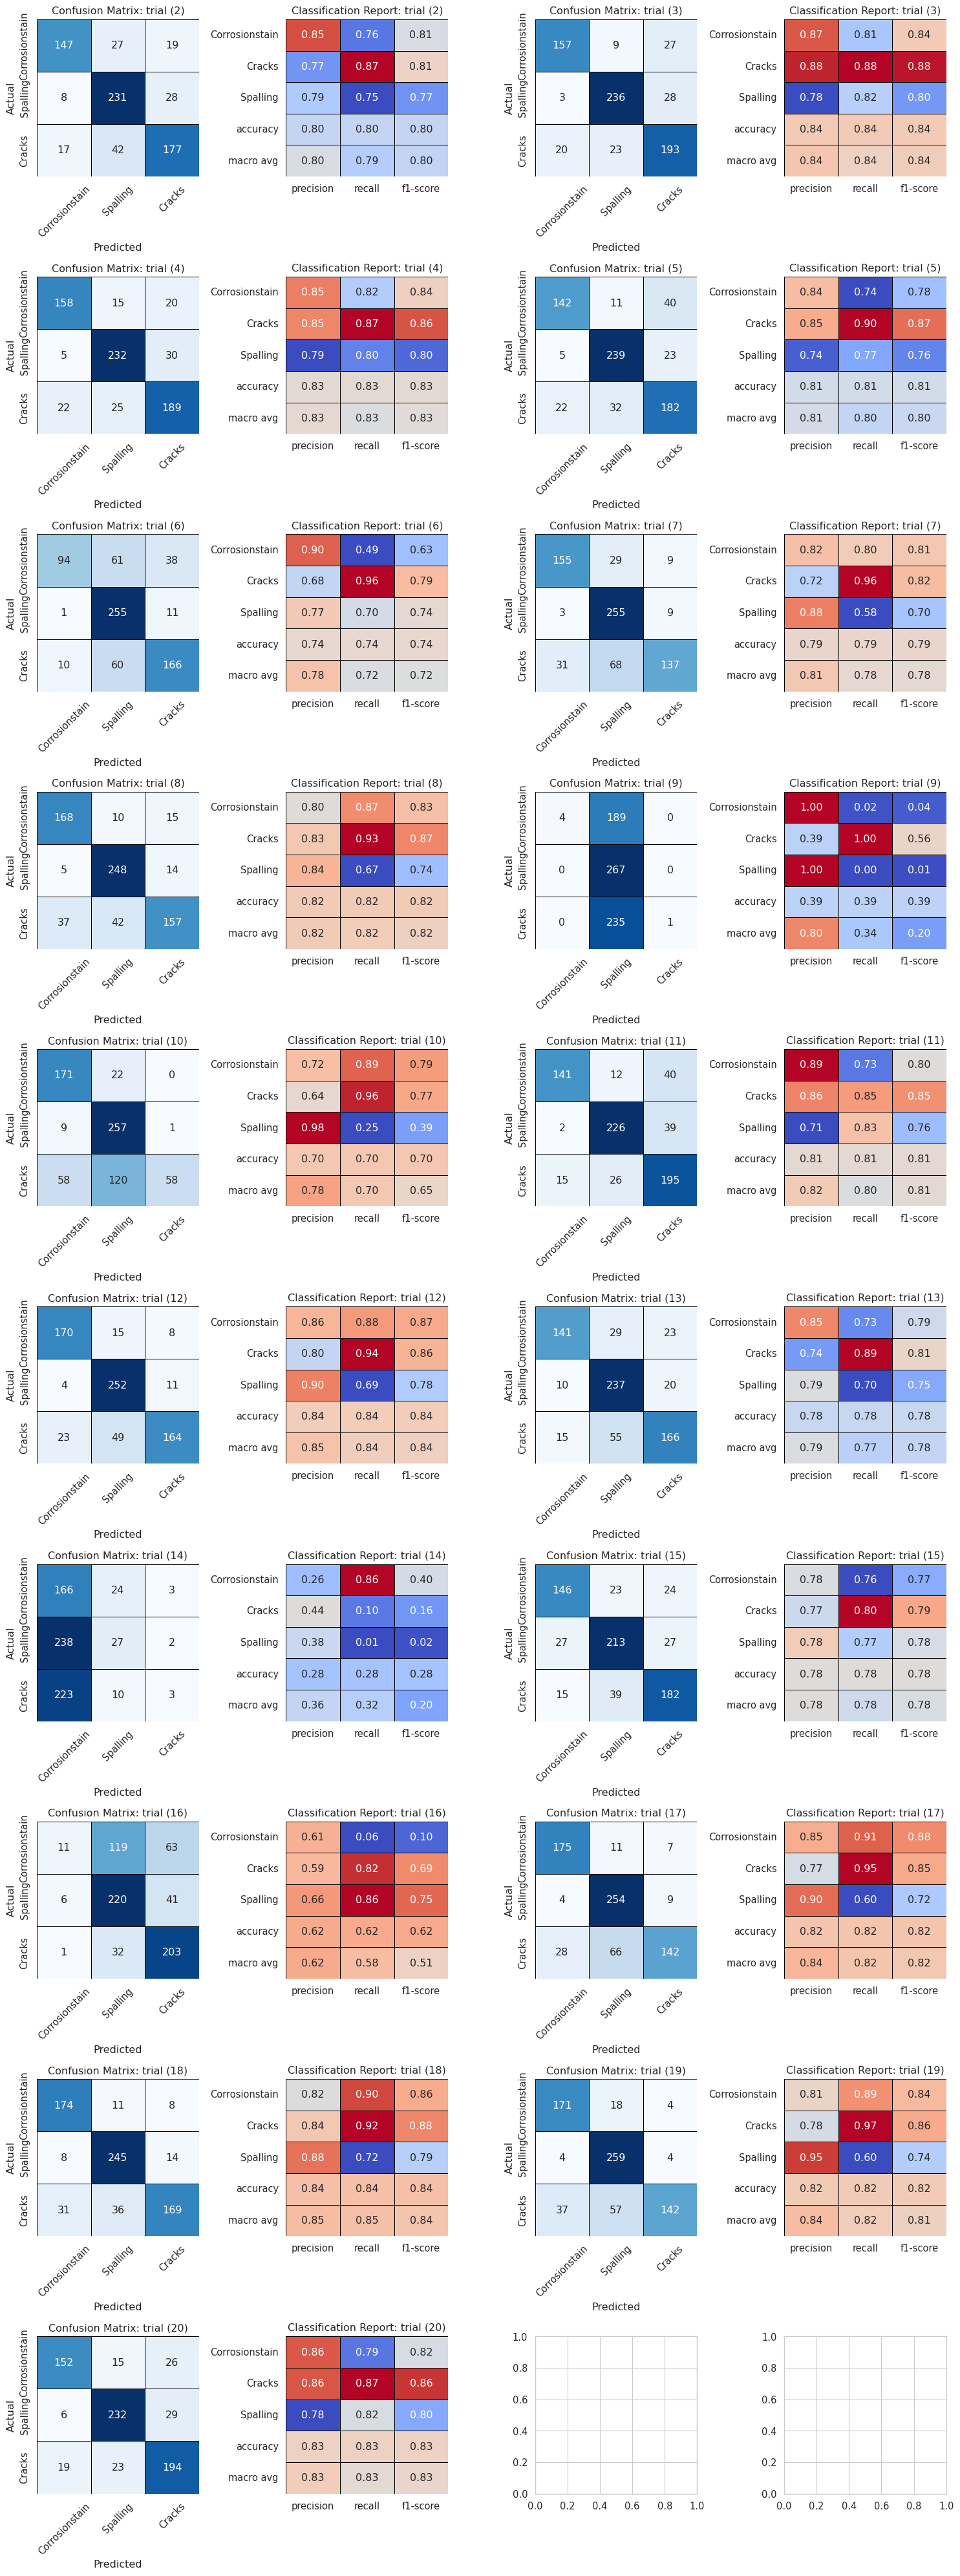

In [44]:
evaluate_model_metrics(CSV_DIR)